Ensemble Learning 알고리즘을 활용하여 여행유형에 영향을미치는 주요요인을 파악하여 여행 유형을 예측 및 추천



In [80]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
font = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')  
plt.rcParams["font.family"] = 'NanumGothic'  

In [81]:
import pandas as pd


data_path = "./myproject/DATA_2022년_국민여행조사_원자료_1.csv"
data = pd.read_csv(data_path, encoding='cp949', low_memory=False)
train = data.copy()

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52041 entries, 0 to 52040
Columns: 2343 entries, ID to 국내_여행방문지_기타당일10
dtypes: float64(2008), object(335)
memory usage: 930.3+ MB
None


In [82]:
train

,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,D_TRA1_VAC,D_TRA1_1_SYEAR,D_TRA1_1_SMONTH,D_TRA1_1_SDAY,D_TRA1_1_EYEAR,D_TRA1_1_EMONTH,D_TRA1_1_EDAY,D_TRA1_1_SPOT,D_TRA1_1_Q6_Ar,D_TRA1_1_Q6,D_TRA1_2_SYEAR,D_TRA1_2_SMONTH,D_TRA1_2_SDAY,D_TRA1_2_EYEAR,D_TRA1_2_EMONTH,D_TRA1_2_EDAY,D_TRA1_2_SPOT,...,국내_여행방문지_관광당일1,국내_여행방문지_관광당일2,국내_여행방문지_관광당일3,국내_여행방문지_관광당일4,국내_여행방문지_관광당일5,국내_여행방문지_관광당일6,국내_여행방문지_관광당일7,국내_여행방문지_관광당일8,국내_여행방문지_관광당일9,국내_여행방문지_관광당일10,국내_여행방문지_기타전체1,국내_여행방문지_기타전체2,국내_여행방문지_기타전체3,국내_여행방문지_기타전체4,국내_여행방문지_기타전체5,국내_여행방문지_기타전체6,국내_여행방문지_기타전체7,국내_여행방문지_기타전체8,국내_여행방문지_기타전체9,국내_여행방문지_기타전체10,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
0,11010550211_277566,0.0,0.0,0.0,0.0,0.0,아니오,아니오,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010550211_277569,1.0,0.0,0.0,0.0,0.0,예,아니오,아니오,아니오,아니오,Y,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",2022.0,1.0,15.0,2022.0,1.0,17.0,2.0,800000.0,5.0,160000.0,해당없음,2022.0,1.0,15.0,2022.0,1.0,15.0,강원도 삼척시,NaN,NaN,2022.0,1.0,15.0,2022.0,1.0,16.0,강원도 삼척시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550211_277571,0.0,0.0,0.0,0.0,0.0,아니오,아니오,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010550211_277572,1.0,0.0,0.0,0.0,0.0,예,아니오,아니오,아니오,아니오,Y,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",2022.0,1.0,9.0,2022.0,1.0,14.0,5.0,1000000.0,1.0,1000000.0,해당없음,2022.0,1.0,9.0,2022.0,1.0,9.0,제주특별자치도 서귀포시,NaN,NaN,2022.0,1.0,9.0,2022.0,1.0,10.0,제주특별자치도 서귀포시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010550211_277588,1.0,0.0,0.0,0.0,0.0,예,아니오,아니오,아니오,아니오,Y,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",2022.0,1.0,30.0,2022.0,1.0,31.0,1.0,399999.0,3.0,133333.0,NaN,2022.0,1.0,30.0,2022.0,1.0,30.0,강원도 강릉시,NaN,NaN,2022.0,1.0,30.0,2022.0,1.0,30.0,강원도 강릉시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52036,3902059083A_580655,0.0,0.0,0.0,0.0,0.0,아니오,아니오,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52037,3902059083A_580912,0.0,0.0,0.0,0.0,0.0,아니오,아니오,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### INFO
- 인덱스: 52041개의 행을 포함하는 RangeIndex
- 컬럼: 2343개의 컬럼, 'ID'에서 '국내_여행방문지_기타당일10'까지
- 데이터 타입: 2008개의 float64 컬럼과 335개의 object 컬럼
- 메모리 사용량: 약 930.3MB

## 사용할 칼럼

- 성별 : BSEX
- 여행유형
   - D_TRA1_CASE, D_TRA2_CASE, D_TRA3_CASE, D_TRA4_CASE, D_TRA5_CASE, D_TRA6_CASE, D_TRA7_CASE, D_TRA8_CASE
- 연령 : BAGE
- 거주지역 : BARA
- 월별 : BMON
- 방문지
    - 'D_TRA1_1_SPOT','D_TRA1_2_SPOT','D_TRA1_3_SPOT','D_TRA1_4_SPOT','D_TRA1_5_SPOT', 'D_TRA1_6_SPOT','D_TRA1_7_SPOT'
- 숙박지
    - 'D_TRA1_1_Q6_Ar', 'D_TRA1_2_Q6_Ar','D_TRA1_3_Q6_Ar','D_TRA1_4_Q6_Ar','D_TRA1_5_Q6_Ar','D_TRA1_6_Q6_Ar' 
- 동반자 
    - A7 : 동반자 수_본인포함
    - 유형 A7B_1(가족) A7B_2(친척) A7B_3(친구,연인) A7B_4(동료) A7B_5(친목단체) A7B_6(학교단체) A7B_7(기타)
- 여행일수  'D_TRA1_S_Day', 'D_TRA2_S_Day', 'D_TRA3_S_Day', 'D_TRA4_S_Day', 'D_TRA5_S_Day', 'D_TRA6_S_Day'
- 여행지에서 활동  A5_1 ~ A5_21
- 여행 비용 'D_TRA1_COST' : 보류


### 1. 성별

In [17]:
train['BSEX']

0          남자
1          여자
2          남자
3          여자
4          남자
         ... 
52036      남자
52037      남자
52038      여자
52039      여자
52040      남자
Name: BSEX, Length: 52041, dtype: object

In [18]:

from sklearn.preprocessing import LabelEncoder

train['BSEX'].isnull().sum()



0

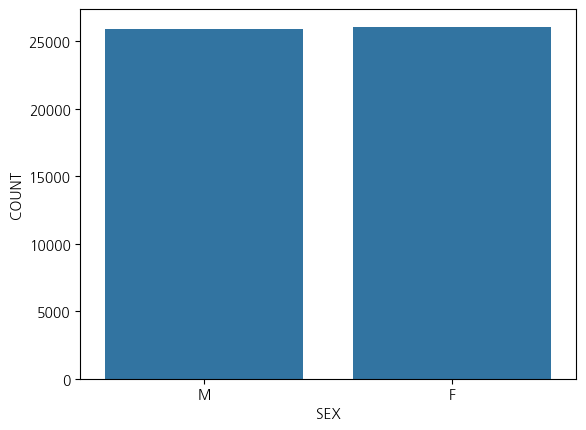

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=train, x='BSEX')
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.xticks([0, 1], ['M', 'F'])  
plt.show()


### 2. 여행 유형
T_type = ['D_TRA1_CASE', 'D_TRA2_CASE', 'D_TRA3_CASE', 'D_TRA4_CASE', 'D_TRA5_CASE', 'D_TRA6_CASE']

- 항목
1. 국내 관광/휴양여행
2. 국내 가족/친지/친구방문여행
3. 국내 단순 가족/친지/친구 방문
4. 국내 출장/업무 여행(관광포함)
5. 국내 단순 출장/업무 경험 (관광 비포함)
6. 1년 이하 해외여행 경험

6번은 필요성이 낮아보임

In [20]:
T_type = ['D_TRA1_CASE', 'D_TRA2_CASE', 'D_TRA3_CASE', 'D_TRA4_CASE', 'D_TRA5_CASE', 'D_TRA6_CASE']
train[T_type]

,D_TRA1_CASE,D_TRA2_CASE,D_TRA3_CASE,D_TRA4_CASE,D_TRA5_CASE,D_TRA6_CASE
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",NaN,NaN,NaN,NaN,NaN
4,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
52036,NaN,NaN,NaN,NaN,NaN,NaN
52037,NaN,NaN,NaN,NaN,NaN,NaN
52038,NaN,NaN,NaN,NaN,NaN,NaN
52039,"국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)",NaN,NaN,NaN,NaN,NaN


In [21]:
T_type = ['D_TRA1_CASE', 'D_TRA2_CASE', 'D_TRA3_CASE', 'D_TRA4_CASE', 'D_TRA5_CASE', 'D_TRA6_CASE']
train[T_type].isnull().sum()

D_TRA1_CASE    27025
D_TRA2_CASE    50653
D_TRA3_CASE    51914
D_TRA4_CASE    52017
D_TRA5_CASE    52035
D_TRA6_CASE    52039
dtype: int64

In [22]:
train = train.dropna(subset=['D_TRA1_CASE'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25016 entries, 1 to 52039
Columns: 2343 entries, ID to 국내_여행방문지_기타당일10
dtypes: float64(2008), object(335)
memory usage: 447.4+ MB


#### Drop 후 train.info()
- 행: 25,016개 (1에서 52,039까지 인덱싱)
- 열: 2,343개 ("ID"에서 "국내_여행방문지_기타당일10"까지)
- 데이터 타입 :
    - float64: 2,008개 열은 소수점 숫자를 포함
    - int32: 2개 열은 정수 값을 포함
    - object: 333개 열은 텍스트 또는 혼합된 데이터 유형을 포함
- 메모리 사용량: 447.2MB 이상

In [23]:
keyword = "해외"
count = train['D_TRA1_CASE'].str.contains(keyword).sum()
print(count)

0


In [24]:
value_counts = train['D_TRA1_CASE'].value_counts()
print(value_counts)

D_TRA1_CASE
국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)    16966
국내 가족/친지/친구 방문 여행 - 관광/휴양 활동 포함                       4275
국내 단순 가족/친지/친구 방문 - 관광/휴양 활동이 포함되지 않음                 2848
국내 단순 출장/업무 경험 - 관광/휴양 활동이 포함되지 않음                     512
국내 출장/업무 여행 - 관광/휴양 활동 포함                              415
Name: count, dtype: int64


In [25]:
train['D_TRA1_CASE'] = train['D_TRA1_CASE'].replace({'국내 관광/휴양 여행(가족/친지/친구 방문, 출장/업무 활동 없는 단순 관광/휴양 여행)': '단순관광'})
train['D_TRA1_CASE'] = train['D_TRA1_CASE'].replace({'국내 가족/친지/친구 방문 여행 - 관광/휴양 활동 포함': '가족/친지/친구방문(관광포함)'})
train['D_TRA1_CASE'] = train['D_TRA1_CASE'].replace({'국내 단순 가족/친지/친구 방문 - 관광/휴양 활동이 포함되지 않음': '단순가족/친지/친구방문'})
train['D_TRA1_CASE'] = train['D_TRA1_CASE'].replace({'국내 단순 출장/업무 경험 - 관광/휴양 활동이 포함되지 않음': '단순출장/업무'})
train['D_TRA1_CASE'] = train['D_TRA1_CASE'].replace({'국내 출장/업무 여행 - 관광/휴양 활동 포함': '출장/업무(관광포함)'})

In [26]:
value_counts = train['D_TRA1_CASE'].value_counts()
print(value_counts)

D_TRA1_CASE
단순관광                16966
가족/친지/친구방문(관광포함)     4275
단순가족/친지/친구방문         2848
단순출장/업무               512
출장/업무(관광포함)           415
Name: count, dtype: int64


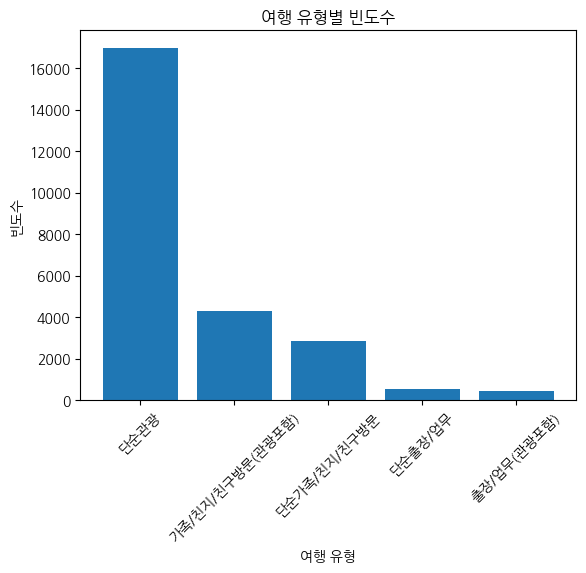

In [27]:
import matplotlib.pyplot as plt

travel_type_counts = train['D_TRA1_CASE'].value_counts()
plt.bar(travel_type_counts.index, travel_type_counts.values)
plt.xlabel('여행 유형')
plt.ylabel('빈도수')
plt.title('여행 유형별 빈도수')
plt.xticks(rotation=45)
plt.show()


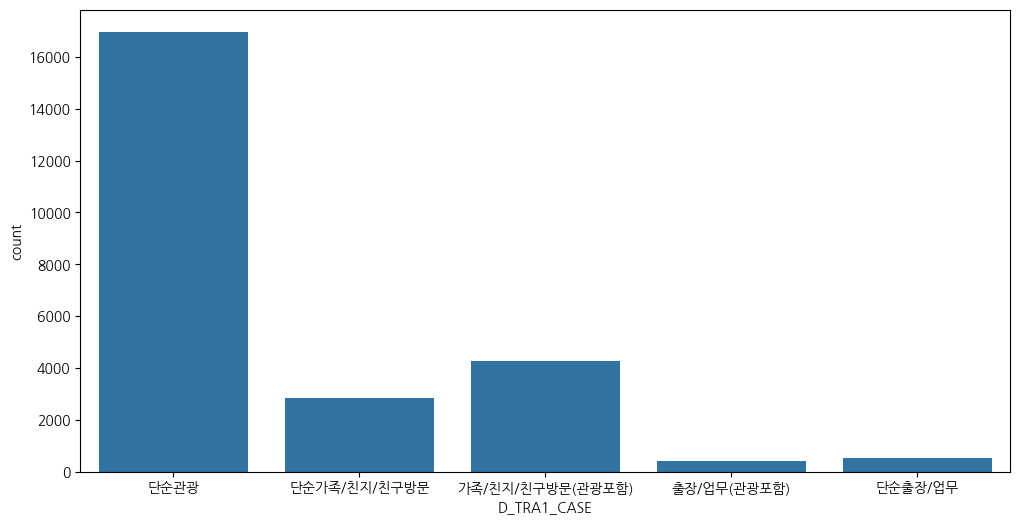

In [28]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='D_TRA1_CASE', data=train)
plt.xlabel('D_TRA1_CASE')
plt.ylabel('count')
plt.show()

- 단순광광의 비율이 압도적으로 많음

### 3. 연령 : BAGE

In [29]:
train['BAGE'].value_counts()

BAGE
  40대       5231
  50대       5212
  30대       4377
  20대       4088
  60대       3596
  70세이상     1674
  15~19세     838
Name: count, dtype: int64

In [30]:
train['BAGE'].isnull().sum()

0

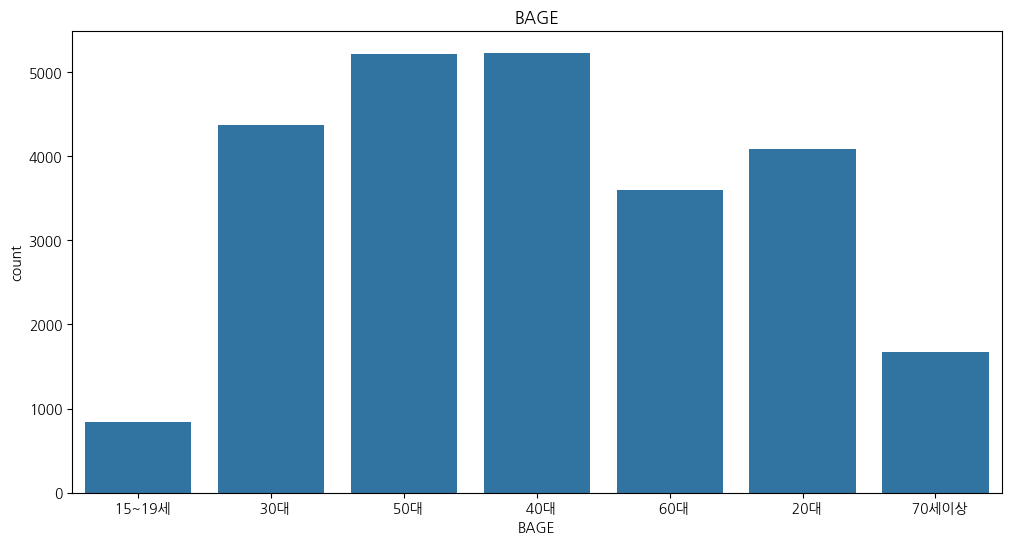

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BAGE', data=train)
plt.title('BAGE')
plt.xlabel('BAGE')
plt.ylabel('count')
plt.show()

### 4. 거주지역 : BARA

In [32]:
train['BARA'].value_counts()

BARA
  경기    4482
  서울    2473
  경남    1808
  전남    1803
  경북    1715
  전북    1635
  충남    1619
  강원    1310
  부산    1285
  충북    1270
  인천    1070
  대구     993
  광주     945
  대전     929
  울산     838
  세종     655
  제주     186
Name: count, dtype: int64

In [33]:
train['BARA'].isnull().sum()

0

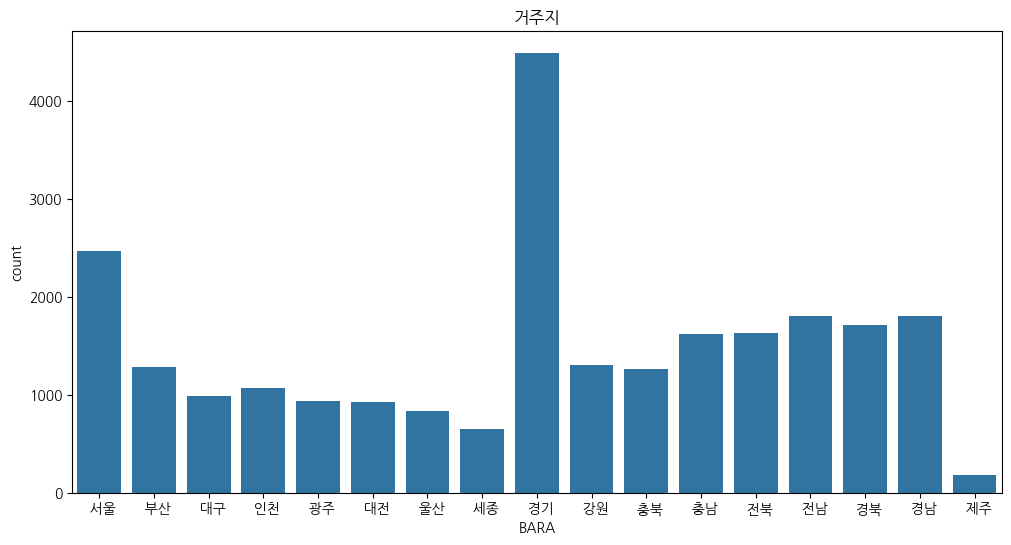

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BARA', data=train)
plt.title('거주지')
plt.xlabel('BARA')
plt.ylabel('count')
plt.show()

### 5. 월별 : BMON

In [35]:
train['BMON'].value_counts()

BMON
  9월     2349
  8월     2260
  10월    2216
  5월     2212
  7월     2165
  12월    2165
  11월    2117
  6월     2066
  4월     1952
  1월     1928
  2월     1840
  3월     1746
Name: count, dtype: int64

In [36]:
train['BMON'].isnull().sum()


0

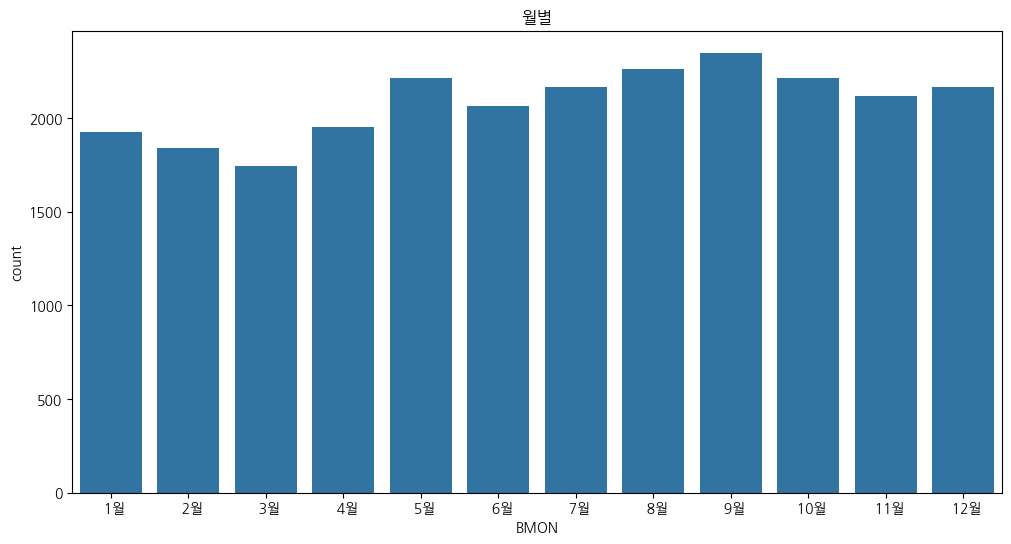

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BMON', data=train)
plt.title('월별')
plt.xlabel('BMON')
plt.ylabel('count')
plt.show()

- 데이터가 전반적으로 균일함

### 6. 방문지  
- 'D_TRA1_1_SPOT','D_TRA1_2_SPOT','D_TRA1_3_SPOT','D_TRA1_4_SPOT','D_TRA1_5_SPOT', 'D_TRA1_6_SPOT','D_TRA1_7_SPOT'...


In [38]:

col = ['D_TRA1_1_SPOT','D_TRA1_2_SPOT','D_TRA1_3_SPOT','D_TRA1_4_SPOT','D_TRA1_5_SPOT', 'D_TRA1_6_SPOT','D_TRA1_7_SPOT']
train[col].isnull().sum()

D_TRA1_1_SPOT        0
D_TRA1_2_SPOT    15722
D_TRA1_3_SPOT    20935
D_TRA1_4_SPOT    23227
D_TRA1_5_SPOT    24041
D_TRA1_6_SPOT    24452
D_TRA1_7_SPOT    24674
dtype: int64

In [39]:
col = ['D_TRA2_1_SPOT', 'D_TRA2_2_SPOT', 'D_TRA2_3_SPOT', 'D_TRA2_4_SPOT', 'D_TRA2_5_SPOT', 'D_TRA2_6_SPOT', 'D_TRA2_7_SPOT']
train[col].isnull().sum()

D_TRA2_1_SPOT    23706
D_TRA2_2_SPOT    24747
D_TRA2_3_SPOT    24890
D_TRA2_4_SPOT    24961
D_TRA2_5_SPOT    24990
D_TRA2_6_SPOT    25004
D_TRA2_7_SPOT    25008
dtype: int64

In [40]:
spot_values = train[train['D_TRA1_S_Day'] == 0]['D_TRA1_1_SPOT']
print(spot_values.info())

<class 'pandas.core.series.Series'>
Index: 14942 entries, 7 to 52039
Series name: D_TRA1_1_SPOT
Non-Null Count  Dtype 
--------------  ----- 
14942 non-null  object
dtypes: object(1)
memory usage: 233.5+ KB
None


In [41]:
import numpy as np
train['당일치기'] = np.where(train['D_TRA1_S_Day'] == 0, train['D_TRA1_1_SPOT'], np.NAN)
train['당일치기'].value_counts()

당일치기
경상북도 경주시     349
경상북도 포항시     252
경기도 가평군      247
경기도 양평군      242
전라남도 담양군     238
            ... 
서울특별시 양천구      4
서울특별시 중랑구      4
서울특별시 성북구      3
강원도 양구군        3
인천광역시 동구       2
Name: count, Length: 228, dtype: int64

### 7. 숙박지
- 1차 조사 : D_TRA1_1_Q6_Ar, D_TRA1_2_Q6_Ar, D_TRA1_3_Q6_Ar, D_TRA1_4_Q6_Ar, D_TRA1_5_Q6_Ar, D_TRA1_6_Q6_Ar
- 2차 조사 :D_TRA2_1_Q6_Ar, D_TRA2_2_Q6_Ar, D_TRA2_3_Q6_Ar, D_TRA2_4_Q6_Ar, D_TRA2_5_Q6_Ar, D_TRA2_6_Q6_Ar
-...

In [42]:
Accom_col =['D_TRA1_1_Q6_Ar', 'D_TRA1_2_Q6_Ar','D_TRA1_3_Q6_Ar','D_TRA1_4_Q6_Ar','D_TRA1_5_Q6_Ar','D_TRA1_6_Q6_Ar']
train[Accom_col].isnull().sum()

D_TRA1_1_Q6_Ar    17017
D_TRA1_2_Q6_Ar    22512
D_TRA1_3_Q6_Ar    24114
D_TRA1_4_Q6_Ar    24622
D_TRA1_5_Q6_Ar    24820
D_TRA1_6_Q6_Ar    24874
dtype: int64

In [43]:
print(train[train['D_TRA1_S_Day'] == 0]['D_TRA1_1_Q6_Ar'].isnull().sum())
print(train[train['D_TRA1_S_Day'] == 0]['D_TRA1_1_Q6_Ar'].info())

14942
<class 'pandas.core.series.Series'>
Index: 14942 entries, 7 to 52039
Series name: D_TRA1_1_Q6_Ar
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 233.5+ KB
None


#### 방문지와 숙박지에 대하여

- 방문지 : '당일치기'
- 숙박지 :'D_TRA1_1_Q6_Ar' 

- 두 데이터는 겹치지 않으므로 여행지로 통합해 관리하는것이 용이해보임. 


In [44]:
train['여행지'] = train['당일치기'].astype(str) + train['D_TRA1_1_Q6_Ar'].astype(str)
idx_to_drop = train[train['여행지'] == 'nannan'].index
train = train.drop(idx_to_drop)

train['여행지'] = train['여행지'].str.replace('nan', '')
train['여행지'].value_counts()
train['여행지'].astype(object)

train['여행지'].value_counts()


여행지
경상북도 경주시      525
강원도 강릉시       505
전라남도 여수시      438
충청남도 보령시      421
부산광역시 해운대구    398
             ... 
서울특별시 중랑구       8
강원도 양구군         7
인천광역시 동구        7
서울특별시 성북구       6
인천광역시 미추홀구      6
Name: count, Length: 229, dtype: int64

In [45]:

train[['여행지(시/도)', '여행지(시/군/구)']] = train['여행지'].str.split(' ', expand=True)
print(train['여행지(시/도)'].value_counts())
print(train['여행지(시/군/구)'].value_counts())

여행지(시/도)
경기도        3173
전라남도       2708
강원도        2274
경상남도       2223
충청남도       2186
경상북도       2169
전라북도       1898
충청북도       1179
부산광역시      1079
서울특별시      1028
제주특별자치도     699
인천광역시       596
대전광역시       510
대구광역시       447
울산광역시       347
광주광역시       238
세종특별자치시     187
Name: count, dtype: int64
여행지(시/군/구)
경주시     525
강릉시     505
중구      501
여수시     438
보령시     421
       ... 
중랑구       8
계룡시       8
양구군       7
성북구       6
미추홀구      6
Name: count, Length: 207, dtype: int64


### 8. 동반자 
- A7 : 동반자 수_본인포함
- 유형 
    - A7B_1(가족) 
    - A7B_2(친척) 
    - A7B_3(친구,연인) 
    - A7B_4(동료) 
    - A7B_5(친목단체) 
    - A7B_6(학교단체) 
    - A7B_7(기타)
- 동반자 수 보다는 동반자 유형으로 분류하는게 나아보임
- A7이 1일때 혼자 여행하는 유형으로 분류할 수 있도록 컬럼을 바꾸는것도 나쁘지 않아보임
- 유형별로 컬럼을 병합하는 것도 나쁘지 않아보임
    


In [46]:
companion = ['A7','A7B_1', 'A7B_2','A7B_3', 'A7B_4','A7B_5','A7B_6','A7B_7']
train[companion].isnull().sum()

A7        2995
A7B_1    11530
A7B_2    22535
A7B_3    16022
A7B_4    22553
A7B_5    22381
A7B_6    22927
A7B_7    22941
dtype: int64

In [47]:
columns_to_drop = ['A7B_2', 'A7B_4', 'A7B_5', 'A7B_6', 'A7B_7']
train[columns_to_drop].notnull().sum()

A7B_2    406
A7B_4    388
A7B_5    560
A7B_6     14
A7B_7      0
dtype: int64

In [48]:
train = train.drop(train[train[columns_to_drop].notnull().any(axis=1)].index)
train[columns_to_drop].notnull().sum()

A7B_2    0
A7B_4    0
A7B_5    0
A7B_6    0
A7B_7    0
dtype: int64

In [49]:

filtered_train = train[(train['A7B_1'].notnull()) & (train['A7B_3'].notnull())]
print(filtered_train[['A7B_1', 'A7B_3']].count())
display(filtered_train[['A7B_1', 'A7B_3']])

A7B_1    307
A7B_3    307
dtype: int64


,A7B_1,A7B_3
1181,"가족(부모, 배우자, 자녀, 형제)",친구/연인
1191,"가족(부모, 배우자, 자녀, 형제)",친구/연인
1221,"가족(부모, 배우자, 자녀, 형제)",친구/연인
1261,"가족(부모, 배우자, 자녀, 형제)",친구/연인
1310,"가족(부모, 배우자, 자녀, 형제)",친구/연인
...,...,...
50834,"가족(부모, 배우자, 자녀, 형제)",친구/연인
50973,"가족(부모, 배우자, 자녀, 형제)",친구/연인
51631,"가족(부모, 배우자, 자녀, 형제)",친구/연인
51760,"가족(부모, 배우자, 자녀, 형제)",친구/연인


In [50]:

drop_= train[(train['A7B_1'].notnull()) & (train['A7B_3'].notnull())].index
train = train.drop(drop_)
train[(train['A7B_1'].notnull()) & (train['A7B_3'].notnull())].info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 2347 entries, ID to 여행지(시/군/구)
dtypes: float64(2008), object(339)
memory usage: 0.0+ bytes


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21266 entries, 7 to 52039
Columns: 2347 entries, ID to 여행지(시/군/구)
dtypes: float64(2008), object(339)
memory usage: 381.0+ MB


In [52]:
# 데이터 관리를 쉽게하기위해서 '동반자'컬럼으로 병합, 위에서 중복데이터는 제거함
train['동반자'] = train['A7B_1'].astype(str) + train['A7B_3'].astype(str)
train['동반자'].value_counts()
train['동반자'] = train['동반자'].str.replace('nannan', '없음')
train['동반자'] = train['동반자'].str.replace('nan', '')
train['동반자'].value_counts()

동반자
가족(부모, 배우자, 자녀, 형제)    10794
친구/연인                   6584
없음                      3888
Name: count, dtype: int64

In [53]:
# 항목 이름 단순화
train['동반자'] = train['동반자'].replace({'가족(부모, 배우자, 자녀, 형제)': '가족'})

In [54]:
train['동반자'].value_counts()

동반자
가족       10794
친구/연인     6584
없음        3888
Name: count, dtype: int64

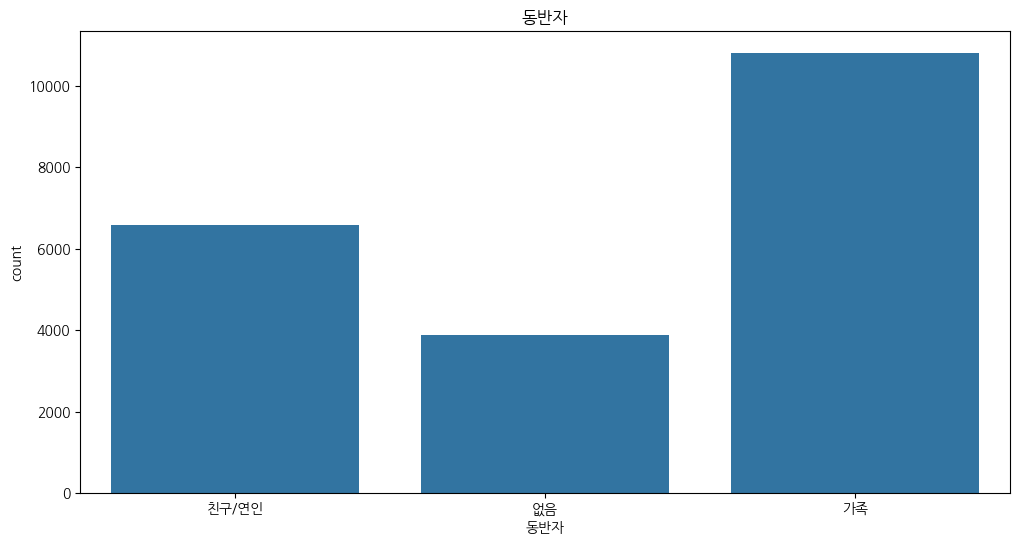

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x='동반자', data=train)
plt.title('동반자')
plt.xlabel('동반자')
plt.ylabel('count')
plt.show()

### 인원수에 대해

In [56]:
print("결측치 수 : ", train['A7'].isnull().sum())
filtered_ = train[train['A7'] == 0]
print("인원수가 0인값 : ",filtered_.shape[0])
filtered_ = train[train['A7'] == 1]
print("인원수가 1인값 : ",filtered_.shape[0])
filtered_ = train[train['A7'] == 2]
print("인원수가 2인값 : ",filtered_.shape[0])
filtered_ = train[train['A7'] == 3]
print("인원수가 3인값 : ",filtered_.shape[0])
filtered_ = train[train['A7'] > 3]
print("인원수가 4인 이상 : ",filtered_.shape[0])


결측치 수 :  2995
인원수가 0인값 :  0
인원수가 1인값 :  893


인원수가 2인값 :  6715
인원수가 3인값 :  4328
인원수가 4인 이상 :  6335


### 9. 여행일수 'D_TRA1_S_Day'
- 여행 유형에서 선택한 바와 같이 1차조사 데이터만 활용 


In [57]:
train['D_TRA1_S_Day'].value_counts()

D_TRA1_S_Day
0.0     13841
1.0      5617
2.0      1466
3.0       224
4.0        48
7.0        15
5.0        14
6.0        10
9.0         7
10.0        5
13.0        3
14.0        3
8.0         3
12.0        2
11.0        2
19.0        1
16.0        1
30.0        1
35.0        1
15.0        1
20.0        1
Name: count, dtype: int64

In [58]:
train['D_TRA1_S_Day'].isnull().sum()

0

In [59]:
t_d0 = train[train['D_TRA1_S_Day'] == 0]
print("당일치기 :", t_d0['D_TRA1_S_Day'].count())
t_d1 = train[(train['D_TRA1_S_Day'] > 0) & (train['D_TRA1_S_Day'] < 2)]
print("1 :", t_d1['D_TRA1_S_Day'].count())
t_d2 = train[(train['D_TRA1_S_Day'] >= 2)]
print("2↑ :", t_d2['D_TRA1_S_Day'].count())

당일치기 : 13841
1 : 5617
2↑ : 1808


In [60]:
bins = [-1, 0, 1, train['D_TRA1_S_Day'].max()]  
labels = ['당일치기', '1일', '2일 이상']  
train['여행일수'] = pd.cut(train['D_TRA1_S_Day'], bins=bins, labels=labels)
label_dict = {'당일치기': 0, '1일': 1, '2일 이상': 2}
train['여행일수'] = train['여행일수'].map(label_dict)
train['여행일수'].value_counts()

여행일수
0    13841
1     5617
2     1808
Name: count, dtype: int64

In [61]:
train[train['여행일수'] == 2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1808 entries, 28 to 52009
Columns: 2349 entries, ID to 여행일수
dtypes: category(1), float64(2008), object(340)
memory usage: 32.4+ MB


In [62]:
idx_to_drop = train[train['여행일수'] == 2].index
train = train.drop(idx_to_drop)
train['여행일수'].value_counts()

여행일수
0    13841
1     5617
2        0
Name: count, dtype: int64

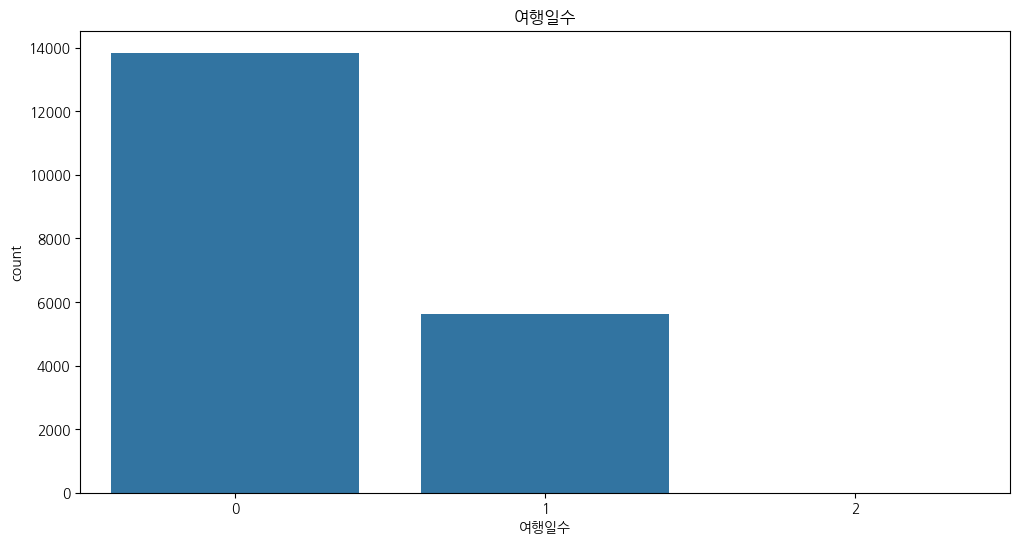

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='여행일수', data=train)
plt.title('여행일수')
plt.xlabel('여행일수')
plt.ylabel('count')
plt.show()

### 10. 여행비용
- 'D_TRA1_COST':'여행비용'

In [64]:
train = train.rename(columns={'D_TRA1_COST': '여행비용'})

count    1.945800e+04
mean     2.058573e+05
std      1.916346e+05
min      1.000000e+03
25%      9.999900e+04
50%      1.500000e+05
75%      2.500020e+05
max      4.040000e+06
Name: 여행비용, dtype: float64


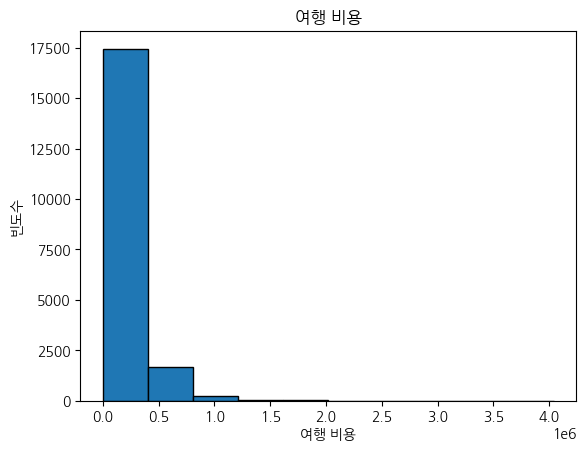

In [65]:

print(train['여행비용'].describe())
# print(train[train['여행비용'] == 0].count())
plt.hist(train['여행비용'], bins=10, edgecolor='black')
plt.xlabel('여행 비용')
plt.ylabel('빈도수')
plt.title('여행 비용')
plt.show()

In [66]:
bins = [0, 100000, 200000, 300000, float('inf')]
labels = ['10만원 미만', '10만원 이상 20만원 미만', '20만원 이상 30만원 미만', '30만원 이상']
train['여행비용'] = pd.cut(train['여행비용'], bins=bins, labels=labels, right=False)
train['여행비용'].value_counts()

여행비용
10만원 이상 20만원 미만    6896
10만원 미만            4870
30만원 이상            4217
20만원 이상 30만원 미만    3475
Name: count, dtype: int64

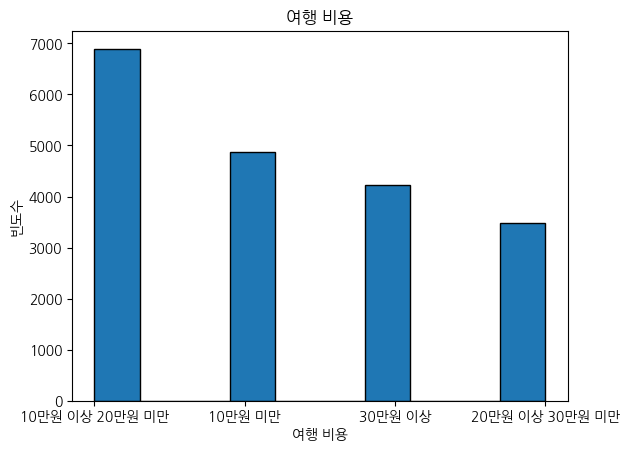

In [67]:
plt.hist(train['여행비용'], bins=10, edgecolor='black')
plt.xlabel('여행 비용')
plt.ylabel('빈도수')
plt.title('여행 비용')
plt.show()

### 11. 여행지에서 활동 // 보류
- A5_1 ~ A5_21


In [68]:
train['A5_1'].value_counts()

A5_1
자연 및 풍경감상    12897
Name: count, dtype: int64

In [69]:
null_counts = train.loc[:, 'A5_1':'A5_21'].isnull().sum()
print(null_counts)

A5_1      6561
A5_2      9621
A5_3     18768
A5_4     18026
A5_5     18481
A5_6      9970
A5_7     19299
A5_8     18496
A5_9     19051
A5_10    19446
A5_11    19246
A5_12    19259
A5_13    18942
A5_14    19451
A5_15    18478
A5_16    18678
A5_17    19307
A5_18    16918
A5_19    19389
A5_20    19374
A5_21    19279
dtype: int64


In [70]:
all_null_rows = train[train.loc[:, 'A5_1':'A5_21'].isnull().all(axis=1)].shape[0]
print(all_null_rows)

2671


### 최종활용 컬럼

- 성별 : BSEX
- 여행유형: D_TRA1_CASE
- 연령 : BAGE
- 거주지역 : BARA
- 월별 : BMON
- 여행지 : "여행지"
- 동반자 : '동반자' 
- 여행일수 : '여행일수'
- 여행 비용 'D_TRA1_COST' 

#### 보류
- 여행지에서 활동  A5_1 ~ A5_21
- 인원수



In [72]:
col = ['BSEX', 'BAGE','BARA', 'D_TRA1_CASE','BMON', '동반자','여행지(시/도)','여행지(시/군/구)','여행일수','여행비용']
train = train[col]
train

,BSEX,BAGE,BARA,D_TRA1_CASE,BMON,동반자,여행지(시/도),여행지(시/군/구),여행일수,여행비용
7,남자,40대,서울,단순관광,1월,친구/연인,강원도,춘천시,0,10만원 이상 20만원 미만
12,여자,15~19세,서울,단순가족/친지/친구방문,2월,친구/연인,경기도,용인시,0,10만원 미만
16,여자,40대,서울,단순가족/친지/친구방문,2월,없음,경기도,용인시,1,10만원 이상 20만원 미만
17,남자,40대,서울,단순관광,2월,가족,경기도,안산시,0,10만원 미만
18,여자,60대,서울,단순관광,2월,가족,인천광역시,강화군,0,10만원 이상 20만원 미만
...,...,...,...,...,...,...,...,...,...,...
52007,남자,60대,제주,단순가족/친지/친구방문,4월,없음,제주특별자치도,제주시,0,10만원 미만
52029,남자,50대,제주,단순관광,6월,가족,서울특별시,구로구,1,20만원 이상 30만원 미만
52033,남자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만
52034,여자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만


In [73]:
# 컬럼 이름 변경
train = train.rename(columns={'BSEX': '성별', 'BAGE': '나이', 'BARA' : '거주지', 'D_TRA1_CASE' : '여행유형','BMON' : '월별', '여행일수': '숙박여부'})
train

,성별,나이,거주지,여행유형,월별,동반자,여행지(시/도),여행지(시/군/구),숙박여부,여행비용
7,남자,40대,서울,단순관광,1월,친구/연인,강원도,춘천시,0,10만원 이상 20만원 미만
12,여자,15~19세,서울,단순가족/친지/친구방문,2월,친구/연인,경기도,용인시,0,10만원 미만
16,여자,40대,서울,단순가족/친지/친구방문,2월,없음,경기도,용인시,1,10만원 이상 20만원 미만
17,남자,40대,서울,단순관광,2월,가족,경기도,안산시,0,10만원 미만
18,여자,60대,서울,단순관광,2월,가족,인천광역시,강화군,0,10만원 이상 20만원 미만
...,...,...,...,...,...,...,...,...,...,...
52007,남자,60대,제주,단순가족/친지/친구방문,4월,없음,제주특별자치도,제주시,0,10만원 미만
52029,남자,50대,제주,단순관광,6월,가족,서울특별시,구로구,1,20만원 이상 30만원 미만
52033,남자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만
52034,여자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만


### 최종 결정컬럼
성별	나이	거주지	여행유형	월별	동반자	여행지(시/도)	여행지(시/군/구)	여행일수	여행비용

In [74]:
col =['성별','나이','거주지','여행유형','월별','동반자','여행지(시/도)','여행지(시/군/구)','숙박여부','여행비용']
train = train[col]
train.to_csv('가공데이터.csv', index=False)
train

,성별,나이,거주지,여행유형,월별,동반자,여행지(시/도),여행지(시/군/구),숙박여부,여행비용
7,남자,40대,서울,단순관광,1월,친구/연인,강원도,춘천시,0,10만원 이상 20만원 미만
12,여자,15~19세,서울,단순가족/친지/친구방문,2월,친구/연인,경기도,용인시,0,10만원 미만
16,여자,40대,서울,단순가족/친지/친구방문,2월,없음,경기도,용인시,1,10만원 이상 20만원 미만
17,남자,40대,서울,단순관광,2월,가족,경기도,안산시,0,10만원 미만
18,여자,60대,서울,단순관광,2월,가족,인천광역시,강화군,0,10만원 이상 20만원 미만
...,...,...,...,...,...,...,...,...,...,...
52007,남자,60대,제주,단순가족/친지/친구방문,4월,없음,제주특별자치도,제주시,0,10만원 미만
52029,남자,50대,제주,단순관광,6월,가족,서울특별시,구로구,1,20만원 이상 30만원 미만
52033,남자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만
52034,여자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만


In [83]:
import pandas as pd
train = pd.read_csv("가공데이터.csv")
train

,성별,나이,거주지,여행유형,월별,동반자,여행지(시/도),여행지(시/군/구),숙박여부,여행비용
0,남자,40대,서울,단순관광,1월,친구/연인,강원도,춘천시,0,10만원 이상 20만원 미만
1,여자,15~19세,서울,단순가족/친지/친구방문,2월,친구/연인,경기도,용인시,0,10만원 미만
2,여자,40대,서울,단순가족/친지/친구방문,2월,없음,경기도,용인시,1,10만원 이상 20만원 미만
3,남자,40대,서울,단순관광,2월,가족,경기도,안산시,0,10만원 미만
4,여자,60대,서울,단순관광,2월,가족,인천광역시,강화군,0,10만원 이상 20만원 미만
...,...,...,...,...,...,...,...,...,...,...
19453,남자,60대,제주,단순가족/친지/친구방문,4월,없음,제주특별자치도,제주시,0,10만원 미만
19454,남자,50대,제주,단순관광,6월,가족,서울특별시,구로구,1,20만원 이상 30만원 미만
19455,남자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만
19456,여자,50대,제주,단순관광,12월,가족,제주특별자치도,제주시,0,10만원 미만
